In [ ]:
# some simple commands

In [ ]:
import torch


In [ ]:
x = torch.tensor([1., 2.])
y = torch.tensor([3., 2.])
x

In [ ]:
x * y

In [ ]:
x = torch.tensor([
                  [1., 2.], 
                  [3., 2.], 
                  [0., 4.],
                 ])
print(x[0][1])
x[0][1].item()

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
torch

In [ ]:
# y = torch.tensor([3., 2.], device="cuda")


In [ ]:
# example with mnist


In [4]:
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
from torch.autograd import Variable

import torch.nn.functional as F

import torch.utils.data as data

In [5]:
train = pd.read_csv("../data/mnist/train.csv")

In [6]:
train_labels = train.label.values
train = train.drop(columns="label").values.reshape(len(train_labels), 1, 28, 28)

In [7]:
# reshape for a NN

In [8]:
# build neural network

In [9]:
train_labels

array([1, 0, 1, ..., 7, 6, 9])

In [10]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        num_labels = len(set(train_labels))
        img_height = 28
        img_width = 28 
        s_in = img_height * img_width
        s2 = 392
        s3 = 196
        s4 = 98
        s_out = num_labels
        
        self.fc1 = nn.Linear(s_in, s2) # fully connected
        self.fc2 = nn.Linear(s2, s3)
        self.fc3 = nn.Linear(s3, s4)
        self.fc4 = nn.Linear(s4, s_out)
        # regularise NN to avoid overfitting
        self.dropout = nn.Dropout(p=0.2) # 20% of nodes will be randomly 
                                         # not used during training iterations 
                                         # makes network more robust since each node
                                          # will not be used in every iteration.
    def forward(self, x):
        """forward pass"""
        x = x.view(x.shape[0], -1) # flatten img size to one long vector
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

            


In [11]:
model = MNISTClassifier()
loss_function = nn.NLLLoss() # negative log likelyhood -> loss = -log(y)
opt = optim.Adam(model.parameters(), lr=0.001)

In [12]:
opt

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [13]:
loss_function

NLLLoss()

In [14]:
model

MNISTClassifier(
  (fc1): Linear(in_features=784, out_features=392, bias=True)
  (fc2): Linear(in_features=392, out_features=196, bias=True)
  (fc3): Linear(in_features=196, out_features=98, bias=True)
  (fc4): Linear(in_features=98, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [18]:
# pytorch requires features to be floats for gradients
# NB  these are torch.Tensor not torch.tensors, 
# the difference is that Tensor is a class, while tensor is a function that turns some data into a Tensor object

y = torch.Tensor(train_labels).long() # long -> 64bit integers
# enforce labels as integers
X = torch.Tensor(train.astype(float)) # 32bit floating-point numbers 


In [21]:
# Training
epochs = 50
# transform to variable so that they have the "backward()" method
images = Variable(X)
labels = Variable(y)

for epoch in range(epochs):
    # set all gradients to zero first
    # gradients are calculated cumulatively on each back prop which is useful in RNNs
    # but in this case we want the gradient of the epoch only
    # so after each pass re-set it to zero
    opt.zero_grad() 
    # make  the forward pass:
    outputs = model(images)
    # calculate the loss
    loss = loss_function(outputs, labels)
    # backprop the loss
    loss.backward()
    # update the model paramates using the optimiser
    opt.step()
    # print the total loss
    print(f"epoch {epoch}/{epochs} Loss: {loss.data.item()}")

epoch 0/50 Loss: 0.23938871920108795
epoch 1/50 Loss: 0.23301757872104645
epoch 2/50 Loss: 0.23362398147583008
epoch 3/50 Loss: 0.22745436429977417
epoch 4/50 Loss: 0.22325892746448517
epoch 5/50 Loss: 0.2213897407054901
epoch 6/50 Loss: 0.21610398590564728
epoch 7/50 Loss: 0.21413403749465942
epoch 8/50 Loss: 0.20667961239814758
epoch 9/50 Loss: 0.208415225148201
epoch 10/50 Loss: 0.2006233036518097
epoch 11/50 Loss: 0.19843028485774994
epoch 12/50 Loss: 0.19707491993904114
epoch 13/50 Loss: 0.19387491047382355
epoch 14/50 Loss: 0.18685035407543182
epoch 15/50 Loss: 0.18974031507968903
epoch 16/50 Loss: 0.18532033264636993
epoch 17/50 Loss: 0.1812715381383896
epoch 18/50 Loss: 0.18038570880889893
epoch 19/50 Loss: 0.18083032965660095
epoch 20/50 Loss: 0.17309242486953735
epoch 21/50 Loss: 0.17113377153873444
epoch 22/50 Loss: 0.17231051623821259
epoch 23/50 Loss: 0.16696247458457947
epoch 24/50 Loss: 0.16861405968666077
epoch 25/50 Loss: 0.1653262823820114
epoch 26/50 Loss: 0.16561901

In [ ]:
# making predictions:

In [57]:
test =  pd.read_csv("../data/mnist/test.csv", )
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
import matplotlib.pyplot as plt


In [60]:
test_labels = test.label.values
test = test.drop(columns='label').values.reshape(len(test), 1, 28,28)

In [62]:
X_test = torch.Tensor(test.astype(float))

In [63]:
preds = model(X_test)

In [64]:
_, prediction_label = torch.max(preds.data, 1)

In [65]:
prediction_label =  prediction_label.tolist()

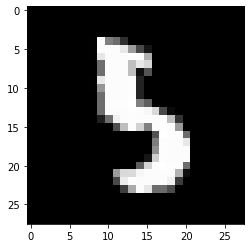

prediction for index 180 is 5, true value is 5


In [83]:
idx = np.random.randint(0, len(test_labels))
plt.imshow(test[idx][0, :, :], cmap=plt.get_cmap('gray'))
plt.show()
print(f"prediction for index {idx} is {prediction_label[idx]}, true value is {test_labels[idx]}")

In [71]:
correct = sum([int(yhat==ytrue) for yhat, ytrue in zip(prediction_label, test_labels)])
print(f" accuracy is: {correct/len(test_labels)}")

 accuracy is: 0.96
